In [2]:
import pickle
import numpy as np

real_vals = [7e-4, -2]

pfad = "/home/tguethle/Documents/spi/Master_Thesis/main_files/spimodfit_comparison_sim_source/pyspi_real_bkg_para2/0374/pre_ppc/"

def mahalanobis_dist(vals, cov, real_vals):
    dif = (vals - real_vals)
    return np.sqrt(np.linalg.multi_dot([dif, np.linalg.inv(cov), dif]))

with open(f"{pfad}/source_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)

mahalanobis_dist(val, cov, real_vals)

1.666381016117736

In [1]:
from astromodels import *

# Create a point source named "pts1"
pts1 = PointSource('pts1',ra=125.23, dec=17.98, spectral_shape=Powerlaw())

# Create the model
my_model = Model(pts1)

10:40:09 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=132393;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=437564;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#50\50]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=779442;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=757137;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=504009;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=663518;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

In [3]:
pts1.spectrum.main.Powerlaw.K.prior.from_unit_cube(1)


AttributeError: 'NoneType' object has no attribute 'from_unit_cube'

In [5]:
l = ["1", "2", "3"]
" ".join(l)

'1 2 3'

In [1]:
import numpy as np
import pickle
import os, sys

In [2]:
with open("/home/tguethle/Documents/spi/Master_Thesis/main_files/crab_fits/only_weak_pulsar/0422/lower_band_w_p/source_parameters.pickle", "rb") as f:
    source_parameters = pickle.load(f)
source_parameters

(array([ 8.58530879e-04, -1.93840578e+00,  3.84513985e-08, -4.64742808e+00]),
 array([[ 3.78402333e-11,  4.15254686e-08,  2.69762161e-14,
         -2.80684690e-07],
        [ 4.15254686e-08,  5.68923185e-05, -5.39276898e-11,
          8.13793017e-05],
        [ 2.69762161e-14, -5.39276898e-11,  5.26342522e-13,
          3.56462615e-07],
        [-2.80684690e-07,  8.13793017e-05,  3.56462615e-07,
          5.28893378e+00]]))

In [3]:
with open("/home/tguethle/Documents/spi/Master_Thesis/main_files/crab_fits/only_weak_pulsar/0043_4_5/lower_band_w_p/source_parameters.pickle", "rb") as f:
    source_parameters = pickle.load(f)
source_parameters

(array([ 8.52015673e-04, -1.94431433e+00,  5.76696989e-09, -2.58918937e-02]),
 array([[ 5.11121394e-12,  5.74043007e-09,  1.76221519e-15,
         -3.26539304e-08],
        [ 5.74043007e-09,  8.19002350e-06, -2.39710776e-13,
         -4.99827060e-05],
        [ 1.76221519e-15, -2.39710776e-13,  5.23081841e-15,
          2.58675312e-08],
        [-3.26539304e-08, -4.99827060e-05,  2.58675312e-08,
          5.42654621e+00]]))

### Problem 
- the irfs are loaded into memory twice. so everything else is really slow once they are loaded.

In [2]:
import sys, os
sys.path.insert(0, os.path.abspath('./main_files'))

import numpy as np
import matplotlib.pyplot as plt
from MultinestClusterFit import MultinestClusterFit
from RebinningFunctions import spimodfit_binning_SE, log_binning_function_for_x_number_of_bins, no_rebinning #, rebin_data_exp_50
from PointingClusters import PointingClusters, save_clusters, load_clusters
from ModelSources import *
import pickle

11:06:38 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=666681;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=887806;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#50\50]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=248356;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=155078;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=104004;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=331814;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

11:06:38 INFO      Starting 3ML!                                                                     ]8;id=146509;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=647974;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py#31\31]8;;\

         WARNING   ROOT minimizer not available                                                ]8;id=451381;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=798468;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1345\1345]8;;\

11:06:39 WARNING   PyGMO is not available                                                      ]8;id=105009;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=225373;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

11:06:39 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=793186;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=672260;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py#79\79]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=304564;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=813159;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py#129\129]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=43097;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=778921;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py#129\129]8;;\
                  software installed and configured?                                                               

         WARNING   No fermitools installed                                              ]8;id=243422;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=792482;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

         WARNING   Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=483986;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=419064;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py#341\341]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=459128;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=423746;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py#341\341]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal     ]8;id=386255;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=201006;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py#341\341]8;;\
                  performances in 3ML                                                                              

Using the irfs that are valid between 04/07/17 08:20:06 and 09/02/19 09:59:57 (YY/MM/DD HH:MM:SS)


In [3]:
sys.path.insert(0, os.path.abspath('./main_files'))
import astropy.io.fits as fits
from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.time as at
from IntegralQuery import SearchQuery, IntegralQuery, Filter, Range

### Testing functions

$K \begin{cases} \left(\frac{x}{piv}\right)^{\alpha} \exp \left(-\frac{(2+\alpha) x}{x_{p}}\right) & x \leq (\alpha-\beta) \frac{x_{p}}{(\alpha+2)} \\ \left(\frac{x}{piv}\right)^{\beta} \exp (\beta-\alpha)\left[\frac{(\alpha-\beta) x_{p}}{piv(2+\alpha)}\right]^{\alpha-\beta} &x>(\alpha-\beta) \frac{x_{p}}{(\alpha+2)} \end{cases} $

Band function from Master-thesis

In [5]:
os.environ['PYSPI_PACKAGE_DATA']

'/home/tguethle/Documents/spi/pyspi_data'

In [21]:
with open("main_files/spimodfit_fits/0043_4_5/crab_low_energy_pl_fit.pickle", "rb") as f:
    crab_low_energy_spimodfit = pickle.load(f)

print(crab_low_energy_spimodfit)
print()

with open("main_files/crab_fits/general_tests/0043_pl_w_p/source_parameters.pickle", "rb") as f:
    crab_low_energy = pickle.load(f)

print(crab_low_energy) # K crab, index crab, K pulsar, index pulsar

(array([ 6.92337207e-04, -2.11411048e+00]), array([[1.88932655e-11, 2.75034615e-08],
       [2.75034615e-08, 4.35021906e-05]]))

(array([ 7.14536448e-04, -2.05505125e+00,  2.02348126e-09, -4.80485301e-01]), array([[ 3.14627587e-11,  4.73649662e-08, -4.11245349e-15,
        -1.45021011e-07],
       [ 4.73649662e-08,  7.73952080e-05, -8.26234946e-12,
        -2.65191661e-04],
       [-4.11245349e-15, -8.26234946e-12,  5.66969300e-16,
         7.98016137e-09],
       [-1.45021011e-07, -2.65191661e-04,  7.98016137e-09,
         5.36255188e+00]]))


In [23]:
crab_low_energy[1].shape

(4, 4)

### reading pickle files

In [7]:
# crab_fits.py sucht hier nach .fits dateien, aber nur pickle hier. vermutlich zu gross fuer github
x = np.load("main_files/SPI_data/0043/pointings.pickle", allow_pickle=True)
# das sind die pointings informationen schon weiter verarbeitet, mulitnestclusterfit braucht irgendwie auch noch die .fits dateien. mal schauen.

In [11]:
print(x[1])
# geclusterte pointingns sind zusammen. 



x[0][0][0][:8] # das ist die pointing id soweit ich weiss. erste vier zahlen stehen moeglicherweisse fuer die revolution nr. oder id

(('004300070010', './main_files/SPI_data/0043'), ('004300090010', './main_files/SPI_data/0043'))


'00430006'

In [12]:
data_folder = "./main_files/pure_simulation_tests/identical_repeats"

pointings = load_clusters(data_folder)

source_model = define_sources((
        (simulated_pl_0374, (200,)),
    ))

for s in source_model.sources.values():

    for p in s.free_parameters.values():
        print(p.path.split("."))




for param in source_model.free_parameters.values():
    print(param.prior.from_unit_cube)

['Simulated_Source_0374', 'spectrum', 'pl', 'Powerlaw', 'K']
['Simulated_Source_0374', 'spectrum', 'pl', 'Powerlaw', 'index']
<bound method Log_uniform_prior.from_unit_cube of   * description: A function which is K/x on the interval lower_bound - upper_bound and
    * 0 outside the interval. The extremes of the interval are NOT counted as part of
    * the interval. Lower_bound must be >= 0.
  * formula: $ f(x)=K~\begin{cases}0 & x \le \text{lower_bound} \\\frac{1}{x} & \text{lower_bound}
    * < x < \text{upper_bound} \\ 0 & x \ge \text{upper_bound} \end{cases}$
  * parameters:
    * lower_bound:
      * value: 1.0e-06
      * desc: Lower bound for the interval
      * min_value: 1.0e-30
      * max_value: .inf
      * unit: ''
      * is_normalization: false
      * delta: 1.0e-21
      * free: true
    * upper_bound:
      * value: 1.0
      * desc: Upper bound for the interval
      * min_value: 1.0e-30
      * max_value: .inf
      * unit: ''
      * is_normalization: false
      

$ f(x)=K~\begin{cases}0 & x \le \text{lowerbound} \\\frac{1}{x} & \text{lowerbound}* < x < \text{upperbound} \\ 0 & x \ge \text{upperbound} \end{cases}$

In [22]:
data_folder = "./main_files/pure_simulation_tests/identical_repeats"

# load  true params======
with open(f"{data_folder}/source_params.pickle", "rb") as f:
    source_ra, source_dec, source_piv, source_Ks, source_indices = pickle.load(f)

with open(f"{data_folder}/pointings.pickle", "rb") as f:
    pointings_form_pickle = pickle.load(f)


# look at fitted source parameters for simulated test 1, run one (accidantly overwritten the pickle file for run 0).
temp_path = f"{data_folder}/1"

with open(f"{temp_path}/source_parameters.pickle", "rb") as f:
    val, cov = pickle.load(f) # prediction of the values K and index in this order

with open(f'{temp_path}/pointing_combinations', 'rb') as f:
    pointing_combinations = f.read()

print(f'predicted values: K={val[0]}, index={val[1]}')
print(f'true_values: K={source_Ks}, index={source_indices}')
print(f'pointing_combinations= {pointing_combinations}')


In [ ]:
p = load_clusters(data_folder)

Filename: /home/tguethle/Documents/spi/Master_Thesis/main_files/spimodfit_fits/0043_4_5/cookbook_dataset_02_0020-0600keV_SE_0043_4_5/expo.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  SPI.-SKY.-IMA    1 ImageHDU        91   (359, 179)   float32   
XTENSION= 'IMAGE   '           / Image extension                                BITPIX  =                  -32 / IEEE 32-bit floating point values              NAXIS   =                    2 / Number of data axes                            NAXIS1  =                  359 / Length of data axis 1                          NAXIS2  =                  179 / Length of data axis 2                          PCOUNT  =                    0 / required keyword; must = 0                     GCOUNT  =                    1 / required keyword; must = 1                     EXTNAME = 'SPI.-SKY.-IMA'      / Extension name                                 EXTREL  = '6.5     '           / IS

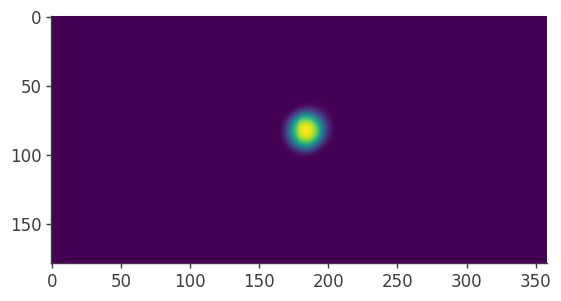

In [6]:
import matplotlib.pyplot as plt
path_to_expo = "/home/tguethle/Documents/spi/Master_Thesis/main_files/spimodfit_fits/0043_4_5/cookbook_dataset_02_0020-0600keV_SE_0043_4_5/expo.fits"

with fits.open(path_to_expo) as file:
        file.info()
        data = file[1].data
        header = file[1].header
        # t = Table.read(file[1])
        

plt.imshow(data)
plt.imshow(np.pad(data, ((0,0), (0,180)), mode="wrap")[:, 180:])
print(header)

In [38]:
spiDataPath = '/home/tguethle/Documents/spi/Master_Thesis/main_files/SPI_data/test_data'


with fits.open(f"{spiDataPath}/evts_det_spec.fits") as file:
        t = Table.read(file[1])
t.keys()


with fits.open(f"{spiDataPath}/energy_boundaries.fits") as file:
        eb = Table.read(file[1])
eb.keys()


with fits.open(f"{spiDataPath}/dead_time.fits") as file:
        dt = Table.read(file[1])
dt.keys()

with fits.open(f"{spiDataPath}/pointing.fits") as file:
        pt = Table.read(file[1])
pt.keys()

['PTID_ISOC',
 'PTID_SPI',
 'OBT_START',
 'OBT_END',
 'TSTART',
 'TSTOP',
 'TELAPSE',
 'RA_SPIX',
 'DEC_SPIX',
 'RA_SPIZ',
 'DEC_SPIZ']

In [41]:
pt



PTID_ISOC,PTID_SPI,OBT_START,OBT_END,TSTART,TSTOP,TELAPSE,RA_SPIX,DEC_SPIX,RA_SPIZ,DEC_SPIZ
,,,,d,d,s,deg,deg,deg,deg
str8,str15,uint16[4],uint16[4],float64,float64,float64,float32,float32,float32,float32
04220001,04220001.000000,0 .. 6771,0 .. 6318,2278.7203725,2278.728705833333,719.9999999895226,80.5504,17.161032,351.1291,-1.8731519
04220002,04220002.000000,0 .. 6318,0 .. 46051,2278.728705833333,2278.74955408531,1801.2889708115836,80.54303,17.15795,351.12195,-1.874352
04220003,04220003.000000,0 .. 5083,0 .. 43909,2278.7514836111113,2278.7717683400047,1752.600576383702,80.01097,19.095612,350.90512,-2.5810678
04220004,04220004.000000,0 .. 3910,0 .. 28649,2278.773150277778,2278.7940316396507,1804.1496658144752,79.46632,21.027014,350.73633,-3.2997618
04220005,04220005.000000,0 .. 2708,0 .. 4935,2278.7954650925926,2278.816320164292,1801.8781948208925,78.89972,22.956406,350.61246,-4.0362062
04220006,04220006.000000,0 .. 1513,0 .. 58399,2278.817687314815,2278.838532139075,1800.9928160783602,78.311325,24.882923,350.53677,-4.785627
04220007,04220007.000000,0 .. 299,0 .. 61285,2278.8403725,2278.8607536828604,1760.9341991512338,80.44779,25.403845,352.37473,-4.049871
04220008,04220008.000000,0 .. 64648,0 .. 13210,2278.862594722222,2278.8829428353574,1758.076974884898,81.00208,23.469294,352.4673,-3.370439


In [50]:
total_live_time = 0
total_zero = 0
for time in dt["LIVETIME"]:
    total_live_time += time
    if time == 0.0:
        total_zero += 1

print(total_live_time / 60 / 60 /24)
print(total_zero)

107.18729951629852
2586


In [1]:
from main_files.MultinestClusterFit import extract_pointing_info
from pyspi.utils.livedets import get_live_dets

<frozen importlib._bootstrap>:228: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 88 from PyObject


16:32:56 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=285931;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=133758;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#50\50]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=830753;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=492936;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

16:32:57 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=728398;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=697728;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

16:32:57 INFO      Starting 3ML!                                                                     ]8;id=899611;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=652772;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py#31\31]8;;\

<frozen importlib._bootstrap>:228: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 88 from PyObject


16:32:58 WARNING   ROOT minimizer not available                                                ]8;id=948198;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=964733;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1345\1345]8;;\

16:32:59 WARNING   PyGMO is not available                                                      ]8;id=121635;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=479947;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

16:33:00 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=244743;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=572747;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py#79\79]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=991578;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=422367;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py#129\129]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=785667;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=682145;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py#129\129]8;;\
                  software installed and configured?                                                               

16:33:00 WARNING   No fermitools installed                                              ]8;id=838775;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=179445;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

         WARNING   Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=39699;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=494583;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py#341\341]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=997904;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=923212;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py#341\341]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal     ]8;id=172612;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=6288;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/threeML/__init__.py#341\341]8;;\
                  performances in 3ML                                                                              

Using the irfs that are valid between 04/07/17 08:20:06 and 09/02/19 09:59:57 (YY/MM/DD HH:MM:SS)


In [3]:
get_live_dets('240326 000000', event_types=["single"]).shape

(15,)

In [54]:
p_id = '04220008'
p_info = extract_pointing_info(spiDataPath, p_id)

[7]


In [53]:
p_info

('060328 204208',
 array([1447.78160559, 1448.51519999,    0.        , 1447.84889899,
        1447.2919049 , 1448.09658413, 1448.05798049, 1449.73189089,
        1448.84372929, 1449.88204858, 1448.42252012, 1449.12983436,
        1452.00099169, 1450.52122212, 1448.97875852, 1448.76935721,
        1450.17399049,    0.        , 1449.94609833]),
 array([  18. ,   18.5,   19. , ..., 1999. , 1999.5, 2000. ], dtype=float32),
 array([[77., 69., 84., ...,  1.,  0.,  0.],
        [63., 52., 62., ...,  0.,  0.,  2.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [53., 69., 56., ...,  1.,  4.,  1.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [42., 53., 47., ...,  2.,  1.,  1.]]))

In [35]:
t['COUNTS'][2]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint32)

In [23]:
t['STAT_ERR'][3]

class:  ndarray
shape:  (3964,)
strides:  (4,)
itemsize:  4
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x7feb4fbece90
byteorder:  big
byteswap:  True
type: >f4
